### Task
1. Update Dataset
2. Automate the updating process


In [0]:
# Load EDA
import pandas as pd
import geopandas as gpd
import descartes

# Data vis pkg
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Load url with data
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recovered_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

In [0]:
# Load our dataset
df_confirmed = pd.read_csv(confirmed_cases_url)


In [94]:
df_confirmed.head(5)



,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43


In [95]:
df_confirmed.shape

(266, 113)

In [96]:
df_confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/30/20', '5/1/20', '5/2/20', '5/3/20', '5/4/20', '5/5/20', '5/6/20',
       '5/7/20', '5/8/20', '5/9/20'],
      dtype='object', length=113)

In [97]:
df_confirmed.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])

,Province/State,Country/Region,Lat,Long,variable,value
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
28989,NaN,Western Sahara,24.215500,-12.885800,5/9/20,6
28990,NaN,Sao Tome and Principe,0.186360,6.613081,5/9/20,208
28991,NaN,Yemen,15.552727,48.516388,5/9/20,34
28992,NaN,Comoros,-11.645500,43.333300,5/9/20,11


In [0]:
comfirm_df = df_confirmed.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])

In [0]:
confirm_df.rename(columns={"variable":"Date", "value":"Confirmed"}, inplace=True)

In [100]:
confirm_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [101]:
confirm_df.shape

(28994, 6)

In [102]:
confirm_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
28989,NaN,Western Sahara,24.215500,-12.885800,5/9/20,6
28990,NaN,Sao Tome and Principe,0.186360,6.613081,5/9/20,208
28991,NaN,Yemen,15.552727,48.516388,5/9/20,34
28992,NaN,Comoros,-11.645500,43.333300,5/9/20,11
28993,NaN,Tajikistan,38.861034,71.276093,5/9/20,612


In [0]:
# Function to fetch and reshape data.
def get_n_melt_data(data_url,case_type):
  df = pd.read_csv(data_url)
  melted_df = df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])
  melted_df.rename(columns={"variable":"Date", "value":case_type}, inplace=True)
  return melted_df


In [0]:
# Fetching data. (Confirmed, Recovered and Death)
confirm_df = get_n_melt_data(confirmed_cases_url, "Confirmed")
recovered_df = get_n_melt_data(recovered_cases_url, "Recovered")
death_df = get_n_melt_data(deaths_cases_url, "Deaths")

In [105]:
# Head
recovered_df.head()
death_df.head()
confirm_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [106]:
# Shape
recovered_df.shape
death_df.shape
confirm_df.shape

(28994, 6)

In [107]:
# printing the shape
print(comfirm_df.shape)
print(recovered_df.shape)
print(death_df.shape)

(28994, 6)
(27468, 6)
(28994, 6)


In [0]:
# Merging Data


In [115]:
confirm_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [109]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,Date,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [110]:
death_df.head()

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [117]:
new_df = confirm_df.join(recovered_df["Recovered"])
new_df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0.0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0.0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0.0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0.0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0.0
...,...,...,...,...,...,...,...
28989,NaN,Western Sahara,24.215500,-12.885800,5/9/20,6,NaN
28990,NaN,Sao Tome and Principe,0.186360,6.613081,5/9/20,208,NaN
28991,NaN,Yemen,15.552727,48.516388,5/9/20,34,NaN
28992,NaN,Comoros,-11.645500,43.333300,5/9/20,11,NaN


In [118]:
# Joining all 3
final_df = new_df.join(death_df["Deaths"])
final_df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0.0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0.0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0.0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0.0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0.0,0
...,...,...,...,...,...,...,...,...
28989,NaN,Western Sahara,24.215500,-12.885800,5/9/20,6,NaN,0
28990,NaN,Sao Tome and Principe,0.186360,6.613081,5/9/20,208,NaN,5
28991,NaN,Yemen,15.552727,48.516388,5/9/20,34,NaN,7
28992,NaN,Comoros,-11.645500,43.333300,5/9/20,11,NaN,1


In [0]:
# Save
final_df.to_csv("COVID_updated.csv")

In [120]:
# Geospacial
final_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Recovered', 'Deaths'],
      dtype='object')

In [0]:
gdf01 = gpd.GeoDataFrame(final_df, geometry=gpd.points_from_xy(final_df["Long"], final_df["Lat"]))

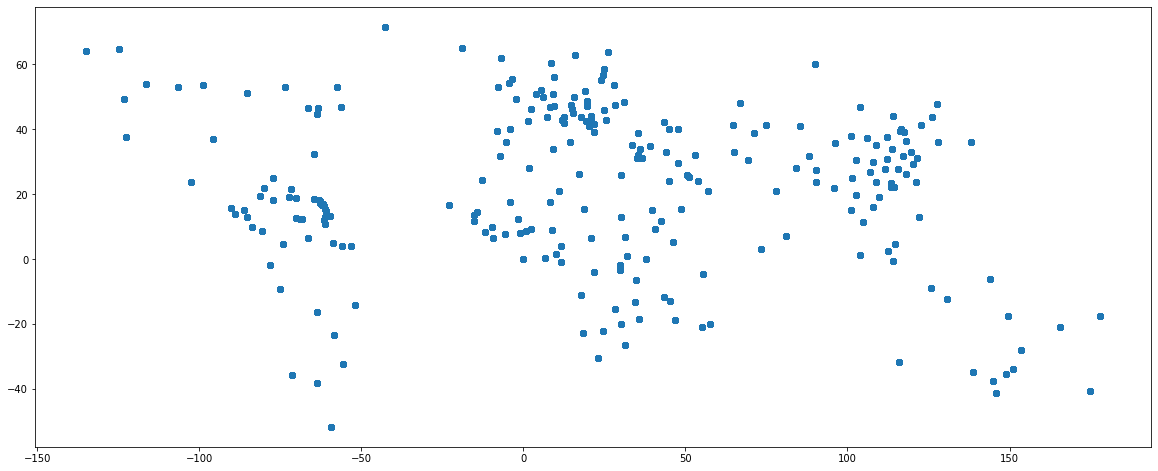

In [123]:
gdf01.plot(figsize=(20, 10))

(-198.0, 198.00000000000006, -98.6822565, 92.32738650000002)

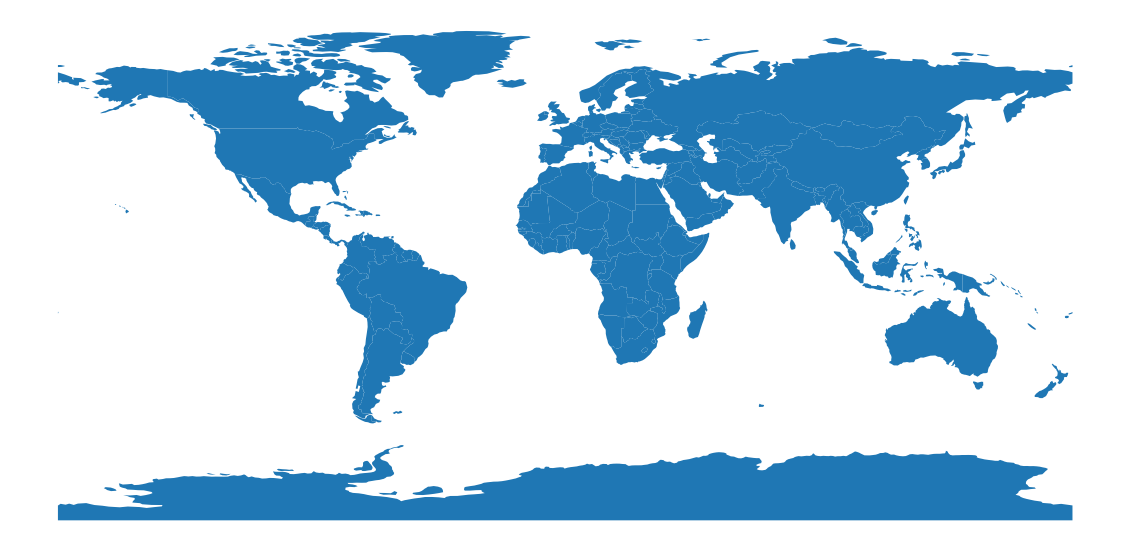

In [124]:
# Overlapping with Worlds Map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
ax = world.plot(figsize=(20, 10))
ax.axis("off")

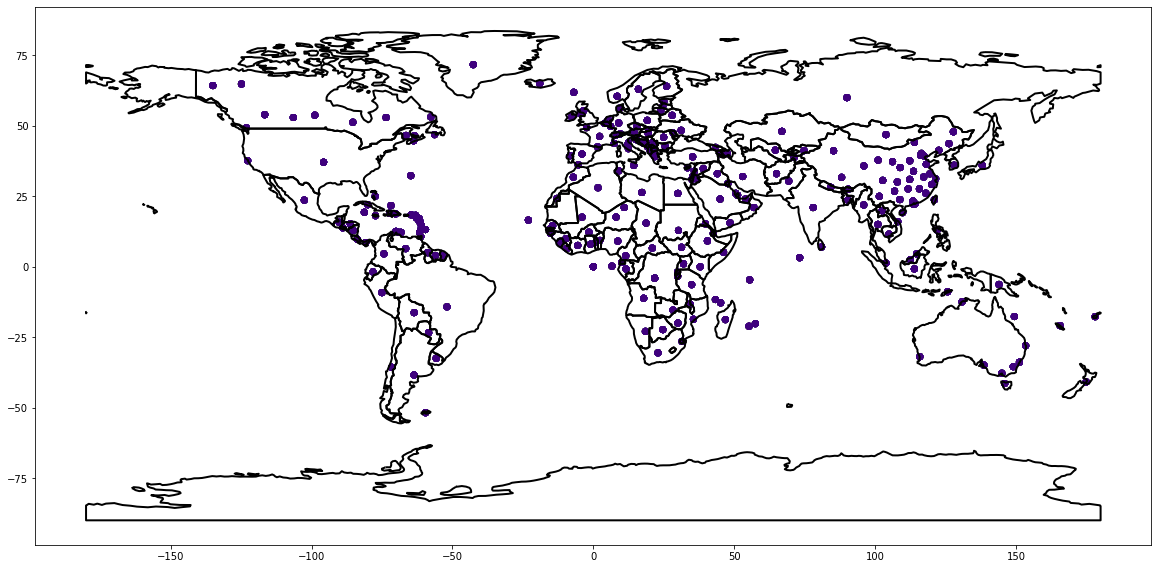

In [132]:
# Overlapping the data.

fig,ax = plt.subplots(figsize=(20, 10))
gdf01.plot(cmap="Purples", ax=ax)
world.geometry.boundary.plot(color=None, edgecolor="k", linewidth=2, ax=ax)